# EDA Exercise

To see a completed version of this exercise, refer to [`examples/eda-exercise`](https://datasci.rice.edu/deep/curriculum/examples/eda-exercise/).

## Prerequisites

You need to install Python! The most convenient distribution for us to use is the Anaconda Distribution, which you can install from here: https://docs.anaconda.com/anaconda/install/.

After installation, ensure that you can follow these instructions to open Jupyter:
https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html

Once you've launched Jupyter, you should be able to double-click on a `.ipynb` file to open a new kernel.

!!! warning "Working Directory"

    You'll want to be careful about where you launch Jupyter and download data to.
    It's best practice to create a folder for your deep project to organize data and 
    launch Jupyter from there.  If jupyter is started from a different directory it might
    be hard to find your data / notebooks!

In [3]:
# it's best practice to have your imports up top so others can immediately know what to install
# if you import more modules, add them here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [5]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

## Acquiring Data

By now you've selected a dataset for this semester.  See below for examples of reading tabular data into Pandas:

In [6]:
# reading from a CSV: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# df = pd.read_csv("data/foo.csv")

# reading from a CSV without column names
# df = pd.read_csv("data/foo.csv", columns=["date", "company", "valuation"])

# WARNING

Be sure that you've installed all the dependencies for this project! From your terminal run:

pip:
```shell
$ # make a virtual environment, e.g. mkvirtualenv deep
$ # activate your virtual environment, e.g. workon deep
$ pip install -r requirements.txt
```

conda:
```shell
$ conda env create --name deep --file requirements.txt
$ conda activate deep
```

In [7]:
# https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm
import requests, zipfile, io

url = "https://www.cftc.gov/files/dea/history/fut_disagg_txt_hist_2006_2016.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("../data")

In [8]:
!ls ../data/

F_Disagg06_16.txt


In [9]:
!head -n1 ../data/F_Disagg06_16.txt

In [10]:
# low_memory=False suppresses a mixed-type warning that can arise w/ messy data.  we're not worried about performance right now, so not a big deal.
df = pd.read_csv("../data/F_Disagg06_16.txt", low_memory=False)

## Structured EDA

Brief overview of the organization which collected our dataset:

> The Commodity Futures Trading Commission (Commission or CFTC) publishes the Commitments of Traders (COT) reports to help the public understand market dynamics. Specifically, the COT reports provide a breakdown of each Tuesday’s open interest for futures and options on futures markets in which 20 or more traders hold positions equal to or above the reporting levels established by the CFTC.

Specific information on our subset:

> The Disaggregated reports are broken down by agriculture, petroleum and products, natural gas and products, electricity and metals and other physical contracts. These reports have a futures only report and a combined futures and options report. The Disaggregated reports break down the reportable open interest positions into four classifications:
> 
> 1. Producer/Merchant/Processor/User
> 2. Swap Dealers
> 3. Managed Money
> 4. Other Reportables

That the disaggregated reports "are broken down ..." implies that there is information in our dataset that clarifies what commodity a given contract is for.  Additionally, we see that there is additional breakdown of open interest -- there are 4 groups of traders which we have OI information for.

### What features are in your dataset?

List of Columns:
https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalViewable/CFTC_023168.html

In [11]:
df.columns

Index(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
       'Report_Date_as_YYYY-MM-DD', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Prod_Merc_Positions_Long_All',
       'Prod_Merc_Positions_Short_All',
       ...
       'Conc_Net_LE_4_TDR_Long_Other', 'Conc_Net_LE_4_TDR_Short_Other',
       'Conc_Net_LE_8_TDR_Long_Other', 'Conc_Net_LE_8_TDR_Short_Other',
       'Contract_Units', 'CFTC_Contract_Market_Code_Quotes',
       'CFTC_Market_Code_Quotes', 'CFTC_Commodity_Code_Quotes',
       'CFTC_SubGroup_Code', 'FutOnly_or_Combined'],
      dtype='object', length=191)

Note that the dataset is in a "wide" format, as there are related fields that have values in the column name, e.g. "Conc...4" vs "Conc...8".  More info on data organization:  

* https://en.wikipedia.org/wiki/Wide_and_narrow_data
* https://vita.had.co.nz/papers/tidy-data.pdf

### What type is each feature?

In [12]:
df.dtypes.value_counts()

float64    72
object     64
int64      55
dtype: int64

#### int data

There seems to be some structure in the column names.  "Prod Merc", "Swap", "M_Money", and "Other" are prefixes matching the breakdown of traders mentioned above.  "All", "Old", and "Other" are suffixes, however I'm not currently sure what they mean.  I suspect "All" refers to the current OI and "Old" refers to the previous (last weeks) OI.

Additionally, we have some date and factor data that was classified as an integer datatype:
* As_of_Date_In_Form_YYMMDD
* CFTC_Region_Code
* CFTC_Commodity_Code
* CFTC_Commodity_Code_Quotes

In [13]:
df.columns[df.columns.str.contains("Date")]

Index(['As_of_Date_In_Form_YYMMDD', 'Report_Date_as_YYYY-MM-DD'], dtype='object')

In [14]:
dates = df["As_of_Date_In_Form_YYMMDD"].astype(str).copy()
idx = dates.str.len() == 5
dates[idx] = "0" + dates[idx] 
dtdf = pd.to_datetime(dates, format="%y%m%d")

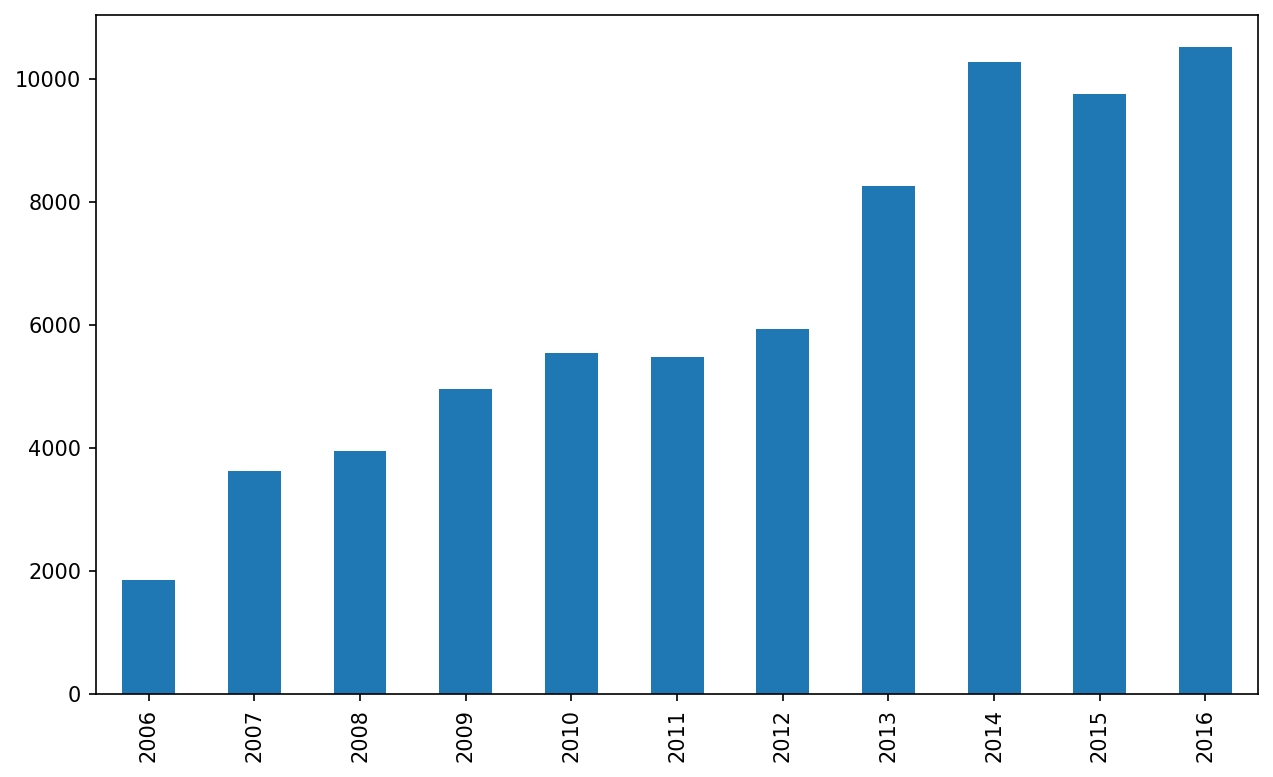

In [15]:
dtdf.dt.year.value_counts().sort_index().plot.bar()

In [16]:
df.dtypes[df.dtypes == "int64"].index

Index(['As_of_Date_In_Form_YYMMDD', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Prod_Merc_Positions_Long_All',
       'Prod_Merc_Positions_Short_All', 'Swap_Positions_Long_All',
       'Swap__Positions_Short_All', 'Swap__Positions_Spread_All',
       'M_Money_Positions_Long_All', 'M_Money_Positions_Short_All',
       'M_Money_Positions_Spread_All', 'Other_Rept_Positions_Long_All',
       'Other_Rept_Positions_Short_All', 'Other_Rept_Positions_Spread_All',
       'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All',
       'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All',
       'Open_Interest_Old', 'Prod_Merc_Positions_Long_Old',
       'Prod_Merc_Positions_Short_Old', 'Swap_Positions_Long_Old',
       'Swap__Positions_Short_Old', 'Swap__Positions_Spread_Old',
       'M_Money_Positions_Long_Old', 'M_Money_Positions_Short_Old',
       'M_Money_Positions_Spread_Old', 'Other_Rept_Positions_Long_Old',
       'Other_Rept_Positions_Short_Old', 

#### float data

In [17]:
df.dtypes[df.dtypes == "float64"].index

Index(['Pct_of_Open_Interest_All', 'Pct_of_OI_Prod_Merc_Long_All',
       'Pct_of_OI_Prod_Merc_Short_All', 'Pct_of_OI_Swap_Long_All',
       'Pct_of_OI_Swap_Short_All', 'Pct_of_OI_Swap_Spread_All',
       'Pct_of_OI_M_Money_Long_All', 'Pct_of_OI_M_Money_Short_All',
       'Pct_of_OI_M_Money_Spread_All', 'Pct_of_OI_Other_Rept_Long_All',
       'Pct_of_OI_Other_Rept_Short_All', 'Pct_of_OI_Other_Rept_Spread_All',
       'Pct_of_OI_Tot_Rept_Long_All', 'Pct_of_OI_Tot_Rept_Short_All',
       'Pct_of_OI_NonRept_Long_All', 'Pct_of_OI_NonRept_Short_All',
       'Pct_of_Open_Interest_Old', 'Pct_of_OI_Prod_Merc_Long_Old',
       'Pct_of_OI_Prod_Merc_Short_Old', 'Pct_of_OI_Swap_Long_Old',
       'Pct_of_OI_Swap_Short_Old', 'Pct_of_OI_Swap_Spread_Old',
       'Pct_of_OI_M_Money_Long_Old', 'Pct_of_OI_M_Money_Short_Old',
       'Pct_of_OI_M_Money_Spread_Old', 'Pct_of_OI_Other_Rept_Long_Old',
       'Pct_of_OI_Other_Rept_Short_Old', 'Pct_of_OI_Other_Rept_Spread_Old',
       'Pct_of_OI_Tot_Rept_Long_Ol

Most of the floating point values represent percentages of the OI counts above.  For example, "Pct_of_Open_Interest_All" is simply `Open_Interest_All / Open_Interest_All = 100%`:

In [18]:
df['Pct_of_Open_Interest_All'].value_counts()

100.0    70199
Name: Pct_of_Open_Interest_All, dtype: int64

The other values represent concentration of the n largest traders among all contracts: 

> The long report, in addition to the information in the short report, groups the data by crop year, where appropriate, and shows the concentration of positions held by the largest four and eight traders.

In [21]:
# strings

In [22]:
floats = df.dtypes[df.dtypes == "float64"].index
floats[floats.str.contains("Conc")]

Index(['Conc_Gross_LE_4_TDR_Long_All', 'Conc_Gross_LE_4_TDR_Short_All',
       'Conc_Gross_LE_8_TDR_Long_All', 'Conc_Gross_LE_8_TDR_Short_All',
       'Conc_Net_LE_4_TDR_Long_All', 'Conc_Net_LE_4_TDR_Short_All',
       'Conc_Net_LE_8_TDR_Long_All', 'Conc_Net_LE_8_TDR_Short_All',
       'Conc_Gross_LE_4_TDR_Long_Old', 'Conc_Gross_LE_4_TDR_Short_Old',
       'Conc_Gross_LE_8_TDR_Long_Old', 'Conc_Gross_LE_8_TDR_Short_Old',
       'Conc_Net_LE_4_TDR_Long_Old', 'Conc_Net_LE_4_TDR_Short_Old',
       'Conc_Net_LE_8_TDR_Long_Old', 'Conc_Net_LE_8_TDR_Short_Old',
       'Conc_Gross_LE_4_TDR_Long_Other', 'Conc_Gross_LE_4_TDR_Short_Other',
       'Conc_Gross_LE_8_TDR_Long_Other', 'Conc_Gross_LE_8_TDR_Short_Other',
       'Conc_Net_LE_4_TDR_Long_Other', 'Conc_Net_LE_4_TDR_Short_Other',
       'Conc_Net_LE_8_TDR_Long_Other', 'Conc_Net_LE_8_TDR_Short_Other'],
      dtype='object')

#### string data

Much of the data that pandas automatically sets to "string dtype" is actually numerical data with missing values.  Note that to indicate missing values in this dataset, they use a "." (period) rather than leaving it blank:

> In order to preserve the confidentiality of traders, for any given commodity
where a specific category has fewer than four active traders, the size of the relevant positions will be
provided but the trader count will be suppressed (specifically, a “·” will appear for trader counts of
fewer than four traders).

Most of the columns in which we are missing data represent these trader counts, however we do have a fair amount of missing data in these "Change" columns.  These "Change" columns specify the change in OI w.r.t. the previous report (last week).  It's possible the nan values in these columns are after a holiday week or at the beginning of the year.

In [23]:
chg = df["Change_in_Open_Interest_All"].copy()
numMissing = pd.to_numeric(chg, errors="coerce").isna().sum()
numPeriod = chg[chg == "."].count()

numMissing, numPeriod

(1369, 1369)

In [24]:
# is there some pattern in the dates that we are missing?
chg = df["Change_in_Open_Interest_All"].copy()
df[pd.to_numeric(chg, errors="coerce").isna()]["Report_Date_as_YYYY-MM-DD"].str.split("-", n=1).str[1].value_counts()

05-07    71
06-13    61
01-27    17
06-28    15
02-23    13
12-17    13
01-28    12
03-25    12
11-26    11
06-23    11
09-29    11
10-18    10
12-15    10
04-28    10
03-24    10
03-22    10
08-17     9
04-21     9
06-16     9
07-29     9
10-28     9
12-22     9
06-21     9
04-26     9
02-16     9
03-31     8
12-31     8
11-25     8
01-26     8
01-20     8
         ..
08-29     1
02-20     1
01-04     1
10-19     1
12-26     1
10-12     1
11-21     1
08-24     1
07-05     1
09-26     1
06-09     1
12-07     1
02-08     1
08-04     1
06-01     1
02-11     1
08-05     1
02-03     1
06-14     1
02-05     1
09-10     1
06-27     1
10-16     1
08-10     1
08-03     1
09-14     1
03-16     1
05-06     1
02-13     1
06-04     1
Name: Report_Date_as_YYYY-MM-DD, Length: 310, dtype: int64

In [25]:
# note that we're missing all of these changes on the same dates.
a = pd.to_numeric(df["Change_in_M_Money_Long_All"], errors="coerce").isna()
b = pd.to_numeric(df["Change_in_M_Money_Short_All"], errors="coerce").isna()
c = pd.to_numeric(df["Change_in_Other_Rept_Long_All"], errors="coerce").isna()

(b != c).sum(), (a != b).sum()

(0, 0)

In [26]:
chg = df["Traders_Swap_Spread_All"]
chg[chg == "."].count()

27212

In [27]:
# actual string / factor data
strings = df.dtypes[df.dtypes == "object"].index
strings[~strings.str.contains("Change") & ~strings.str.contains("Traders")]

Index(['Market_and_Exchange_Names', 'Report_Date_as_YYYY-MM-DD',
       'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'Contract_Units',
       'CFTC_Contract_Market_Code_Quotes', 'CFTC_Market_Code_Quotes',
       'CFTC_SubGroup_Code', 'FutOnly_or_Combined'],
      dtype='object')

### Distribution of each feature?

#### string / factor data

In [28]:
df["Market_and_Exchange_Names"].value_counts()

FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.                      551
HENRY HUB PENULTIMATE GAS SWAP - NEW YORK MERCANTILE EXCHANGE          551
OATS - CHICAGO BOARD OF TRADE                                          551
ROUGH RICE - CHICAGO BOARD OF TRADE                                    551
CORN - CHICAGO BOARD OF TRADE                                          551
SILVER - COMMODITY EXCHANGE INC.                                       551
PALLADIUM - NEW YORK MERCANTILE EXCHANGE                               551
LEAN HOGS - CHICAGO MERCANTILE EXCHANGE                                551
COPPER-GRADE #1 - COMMODITY EXCHANGE INC.                              551
SOYBEAN OIL - CHICAGO BOARD OF TRADE                                   551
MILK, Class III - CHICAGO MERCANTILE EXCHANGE                          551
SOYBEANS - CHICAGO BOARD OF TRADE                                      551
FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE                            551
CRUDE OIL, LIGHT SWEET - 

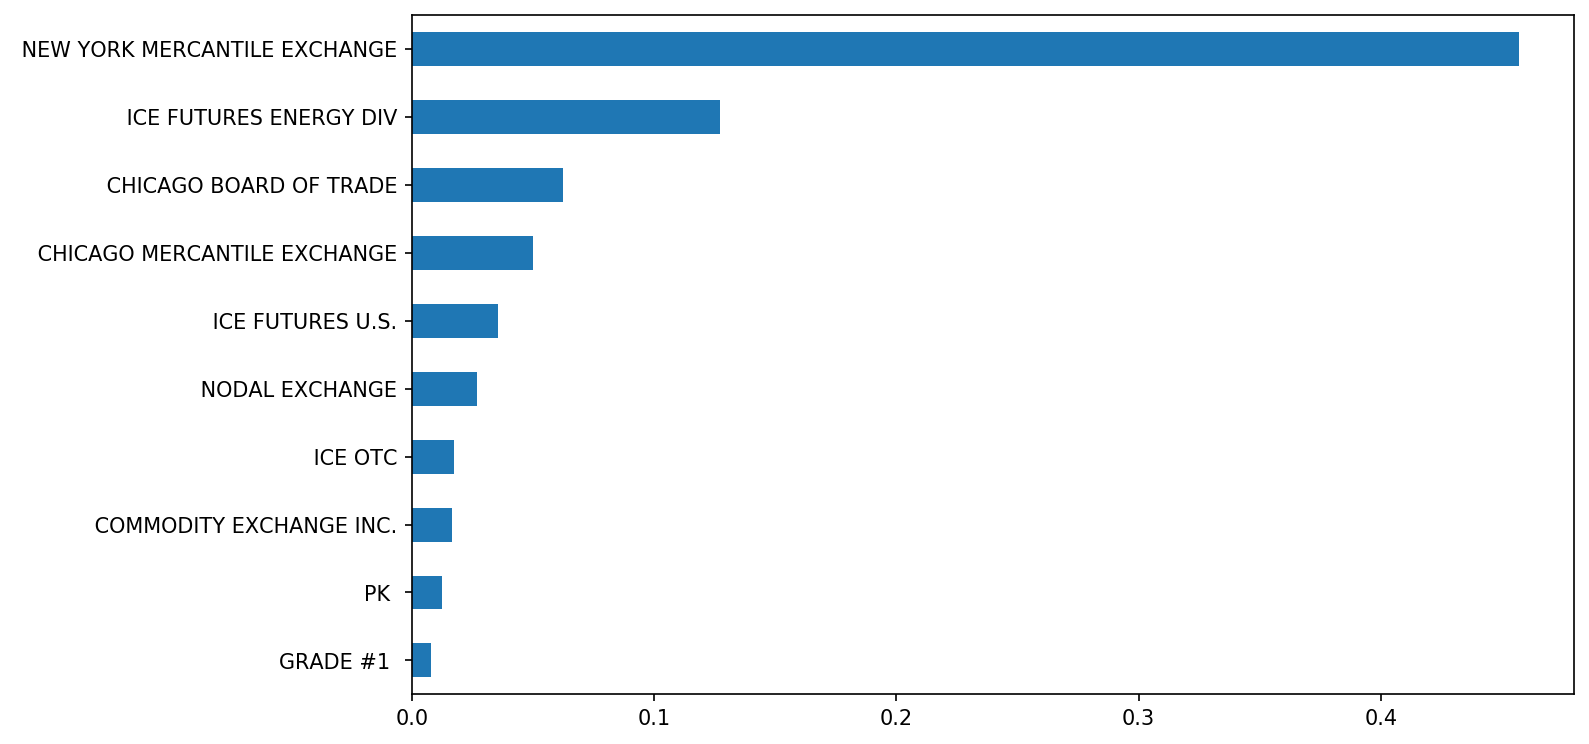

In [29]:
df["Market_and_Exchange_Names"].str.split("-").str[1].value_counts(normalize=True).sort_values().tail(10).plot.barh()

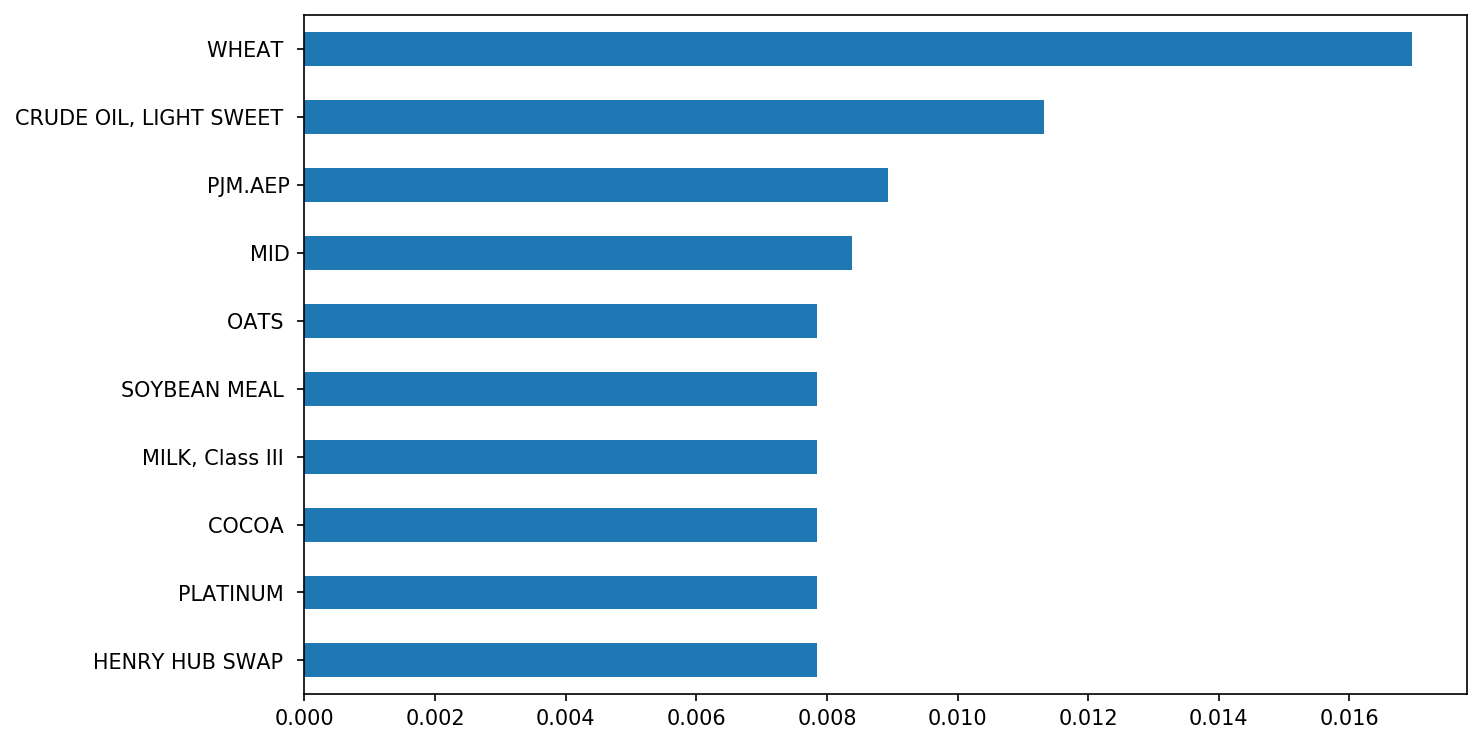

In [30]:
# note that this is counting markets based on the text from the exchange, which may not be universal
df["Market_and_Exchange_Names"].str.split("-").str[0].value_counts(normalize=True).sort_values().tail(10).plot.barh()

In [31]:
dates = df["Report_Date_as_YYYY-MM-DD"].str.split("-", expand=True).rename({
    0: "year",
    1: "month",
    2: "day"
}, axis=1)

It seems that there was a large increase in the quantity of futures markets in 2013 / 2014.  Note that the values we're counting here represent the count of rows in our dataset.  It's possible there was a policy change put into place in 2013 that made running a futures market more attractive.

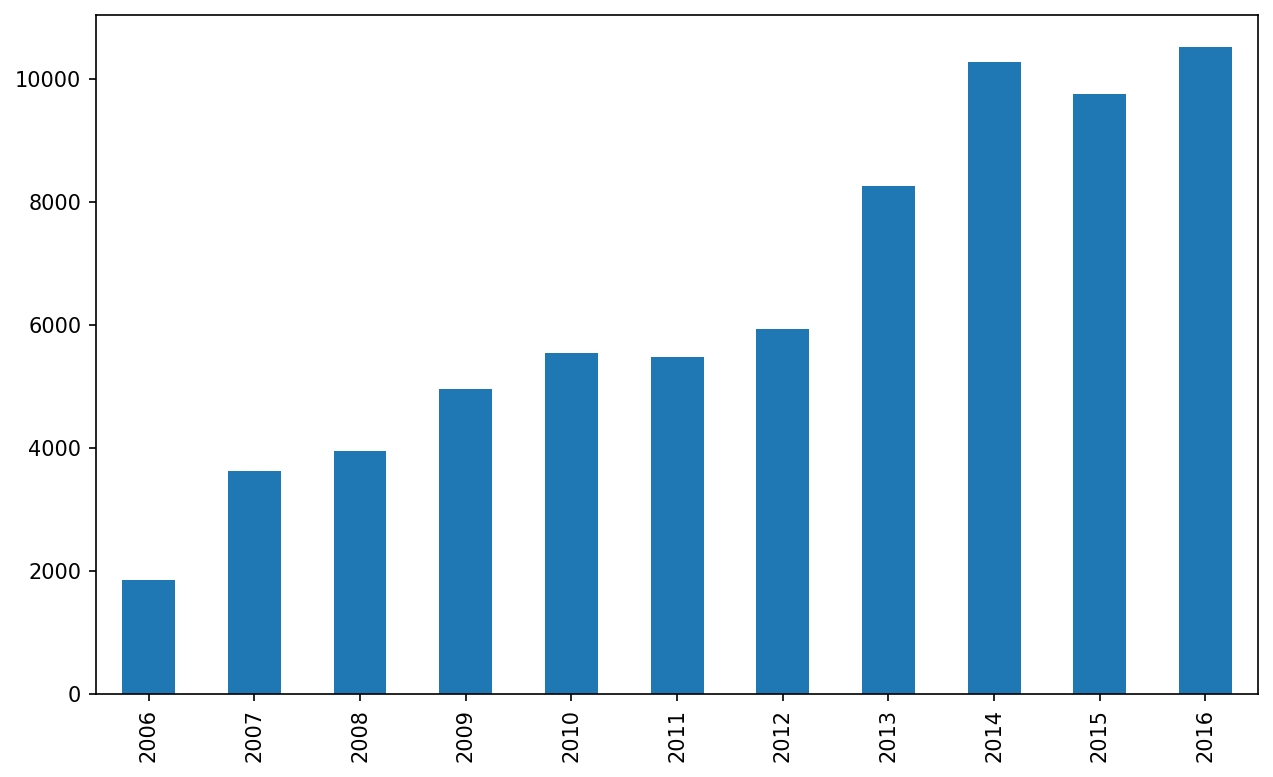

In [32]:
dates.year.value_counts().sort_index().plot.bar()

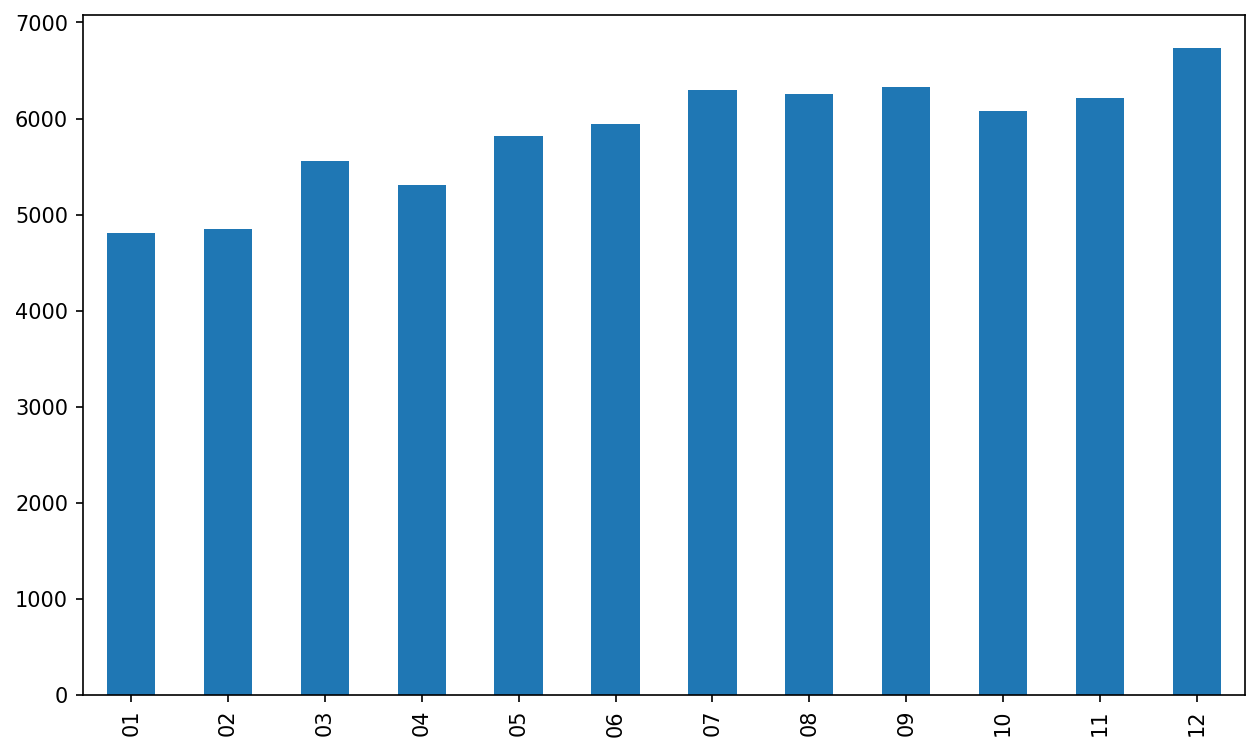

In [33]:
dates.month.value_counts().sort_index().plot.bar()

Note that many futures expire on the start of the month, so we do expect to see somewhat of a dip in open interest towards the end of the month, as most traders do not want to actually fulfill a future.

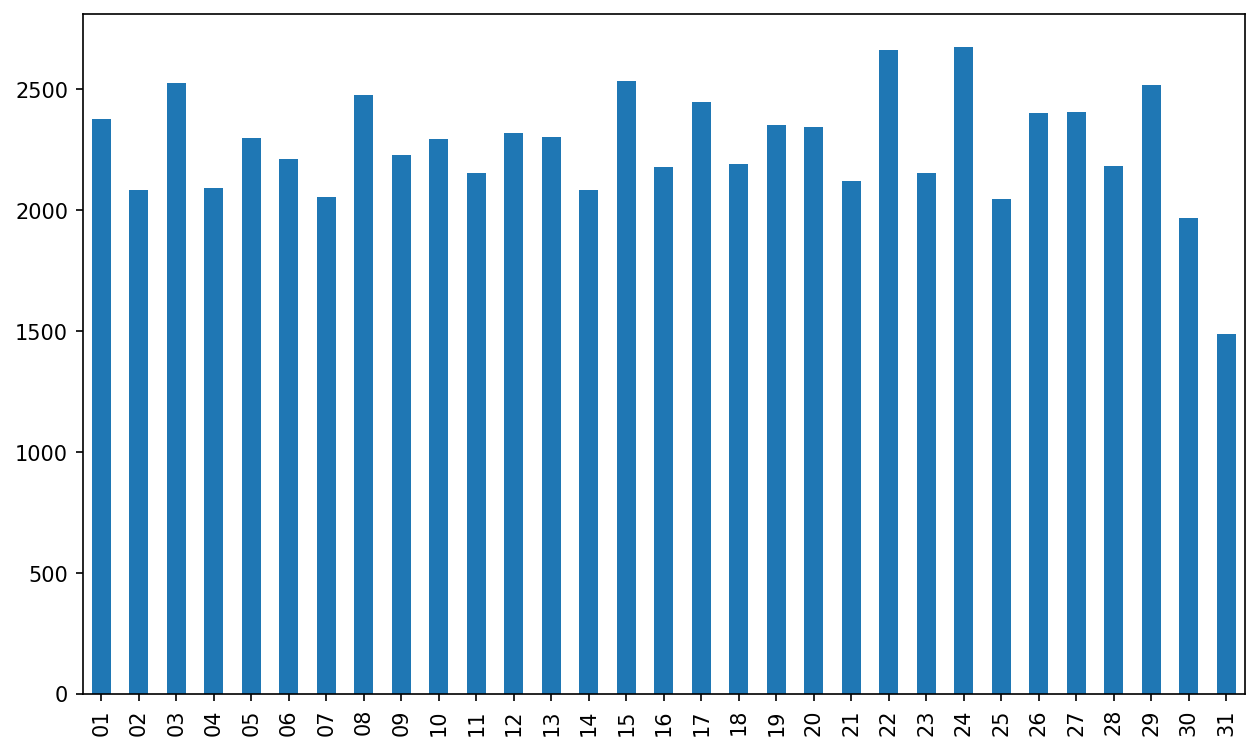

In [34]:
dates.day.value_counts().sort_index().plot.bar()

In [40]:
df["Contract_Units"].value_counts(normalize = True).head(10)

(CONTRACTS OF 1,000 BARRELS)        0.110301
1 MW                                0.062394
(2,500 MMBTU'S)                     0.058448
(Contracts of 2,500  MMBTU'S)       0.056383
2500 mmbtu                          0.054431
(CONTRACTS OF 5,000 BUSHELS)        0.047095
(CONTRACTS OF 42,000 GALLONS)       0.042593
(CONTRACTS OF 1,000 METRIC TONS)    0.039616
Megawatt Hours (MWh)                0.036069
(Contracts of 80 Megawatt Hours)    0.031539
Name: Contract_Units, dtype: float64

In [ ]:
df["Open_Interest_All"]

In [ ]:
df["CFTC_Contract_Market_Code_Quotes"].value_counts()

In [36]:
df["CFTC_Market_Code_Quotes"].value_counts()

NYME    33144
IFED    18290
CBT      3946
CME      3052
NODX     2531
ICUS     2319
CMX      1410
ICE      1382
CBT       761
CME       728
MGE       470
CCX       457
NYBT      436
KCBT      392
ICEU      388
CMX       303
MGE        81
PBOT       77
GE         19
DUMX       13
Name: CFTC_Market_Code_Quotes, dtype: int64

In [37]:
df["CFTC_Commodity_Code_Quotes"].value_counts()

64     21491
23     14328
21      4281
67      3190
66      1807
1       1653
22      1424
111     1393
6       1245
864      937
25       894
865      873
5        870
52       834
866      629
24       607
2        552
76       551
80       551
73       551
83       551
84       551
7        551
85       551
4        551
75       551
88       551
40       551
61       551
33       551
58       551
57       551
54       551
39       551
26       551
32       550
863      456
262      435
50       368
63       320
967      296
867      239
192      184
868      158
195      139
191       60
56        44
869       14
160       10
Name: CFTC_Commodity_Code_Quotes, dtype: int64

In [38]:
df["CFTC_SubGroup_Code"].value_counts()

N16    22098
N13    15957
N10    15947
A10     3307
N20     2382
A50     2204
A30     1972
A20     1697
A25     1522
N60     1245
N25      756
N30      551
A40      551
N70       10
Name: CFTC_SubGroup_Code, dtype: int64

### What do the numeric features represent? Counts? Measurements?

### What are the pairwise relationships between numeric features?

## Brainstorming

Let's take a step back and connect your dataset to its real-world context.  

Consider what these features and values actually represent.  Is there anything unexpected about the features?  What biases or thoughts did you have about this topic before exploring the data?  List off some "facts" that you think are true about your topic.  Our goal in EDA is to reconcile your perspective of the data / topic with the *truth* of the dataset.  What motivated you to choose this dataset?  What insights or questions are you investigating with this dataset?  Now that you've explored each of the features, which might be useful to you in your investigation?

## Open-Ended EDA

EDA is an iterative process.  It begins with answering initial questions which lead to more questions.  Using some of the brainstorming above, come up with at least one concrete investigation into your dataset.  This might be inspecting a specific irregularity, questioning a personal bias, or identifying a specific relationship between two features.  

To do this, you'll likely need to select a subset of your dataset, transform it into a simpler format, and finally visualize or summarize it.  Visualizations are **highly** encouraged at this point!  It's much easier to understand relationships visually.